In [1]:
import numpy as np
import umap
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score as ari

import evoc
import pald

np.random.seed(1234)

/work/home/rsdewol/.conda/envs/PALD/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/work/home/rsdewol/.conda/envs/PALD/lib/python3.12/site-packages/evoc/float_nndescent.py:287: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  points = point_indices[i]


## Load the vectorized data. If these files do not exist run `newgroups_preprocess.ipynb`

In [2]:
we_vectors = np.load("news_vectors.npy")
targets = np.load("news_labels.npy")

# Cut down dataset of the sake of computer

In [3]:
groups = [0, 2, 6, 9, 11, 14]  # Chosen to not be similar
docs_per_group = 500

keep = np.zeros_like(targets, dtype="bool")
for group in groups:
    this_group = targets == group
    random_selection = np.random.choice(
        this_group.nonzero()[0], docs_per_group, replace=False
    )
    for j in random_selection:
        keep[j] = True

labels = targets[keep]
data = we_vectors[keep, :]

print(labels.shape)
print(data.shape)

(3000,)
(3000, 160)


CPU times: user 7min 9s, sys: 321 ms, total: 7min 9s
Wall time: 16 s


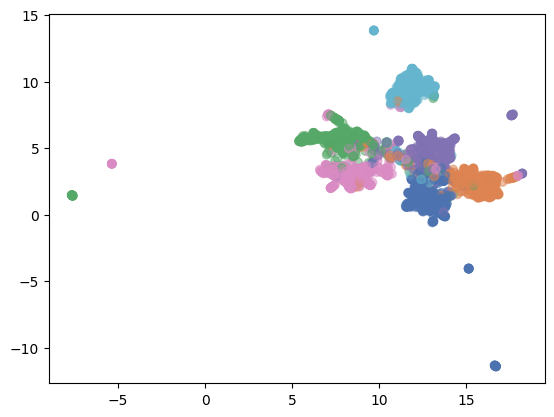

In [4]:
%%time
mapper = umap.UMAP()
data_map = mapper.fit_transform(data)
palette = sns.color_palette("deep", np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
plt.scatter(data_map[:, 0], data_map[:, 1], c=colors, alpha=0.5)

## Comparing UMAP + Clustering

HDBSCAN


PALD
PAKNNLD


Text(0.05, 0.95, 'ARI: 1.0')

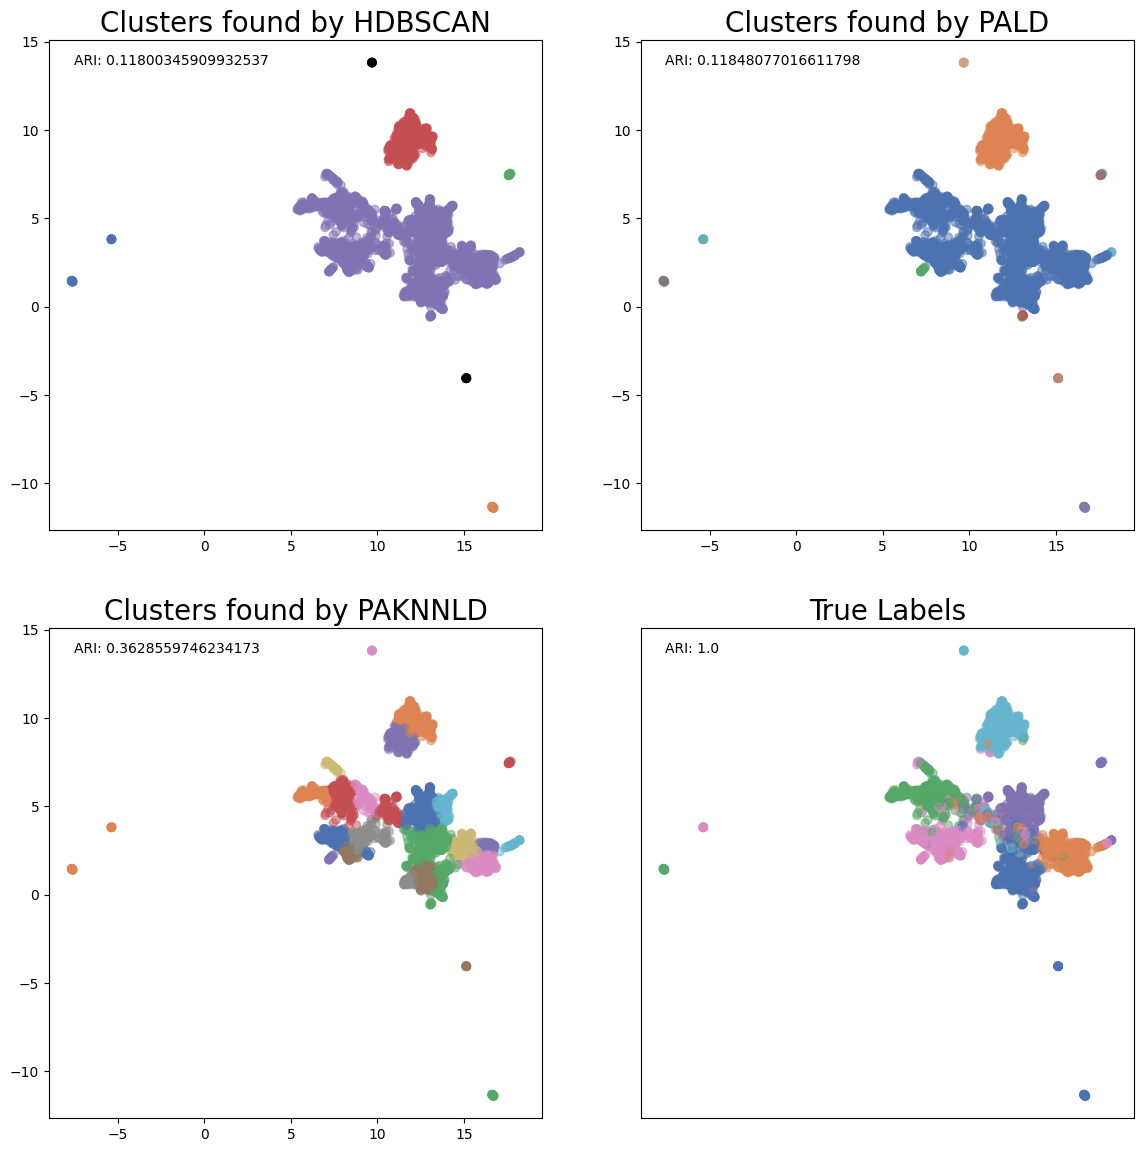

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(14, 14))
# HDBSCAN
print("HDBSCAN")
predict = hdbscan.HDBSCAN(min_cluster_size=15).fit_predict(data_map)
palette = sns.color_palette("deep", np.unique(predict).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in predict]
ax[0, 0].scatter(data_map.T[0], data_map.T[1], c=colors, alpha=0.5)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
ax[0, 0].set_title("Clusters found by HDBSCAN", fontsize=20)
ax[0, 0].annotate(
    f"ARI: {ari(predict, labels)}", xy=(0.05, 0.95), xycoords="axes fraction"
)

# PALD
print("PALD")
predict = pald.PALD(metric="euclidean").fit(data_map).labels_
palette = sns.color_palette("deep", np.unique(predict).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in predict]
ax[0, 1].scatter(data_map.T[0], data_map.T[1], c=colors, alpha=0.5)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
ax[0, 1].set_title("Clusters found by PALD", fontsize=20)
ax[0, 1].annotate(
    f"ARI: {ari(predict, labels)}", xy=(0.05, 0.95), xycoords="axes fraction"
)

# PAKNNLD
print("PAKNNLD")
predict = pald.PAKNNLD(metric="euclidean").fit(data_map).labels_
palette = sns.color_palette("deep", np.unique(predict).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in predict]
ax[1, 0].scatter(data_map.T[0], data_map.T[1], c=colors, alpha=0.5)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
ax[1, 0].set_title("Clusters found by PAKNNLD", fontsize=20)
ax[1, 0].annotate(
    f"ARI: {ari(predict, labels)}", xy=(0.05, 0.95), xycoords="axes fraction"
)

# Labels
palette = sns.color_palette("deep", np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
ax[1, 1].scatter(data_map.T[0], data_map.T[1], c=colors, alpha=0.5)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
ax[1, 1].set_title("True Labels", fontsize=20)
ax[1, 1].annotate(f"ARI: {ari(labels, labels)}", xy=(0.05, 0.95), xycoords="axes fraction")

## Cluster in High Space then Show UMAP plot

EVoC
PALD
PAKNNLD


Text(0.05, 0.95, 'ARI: 1.0')

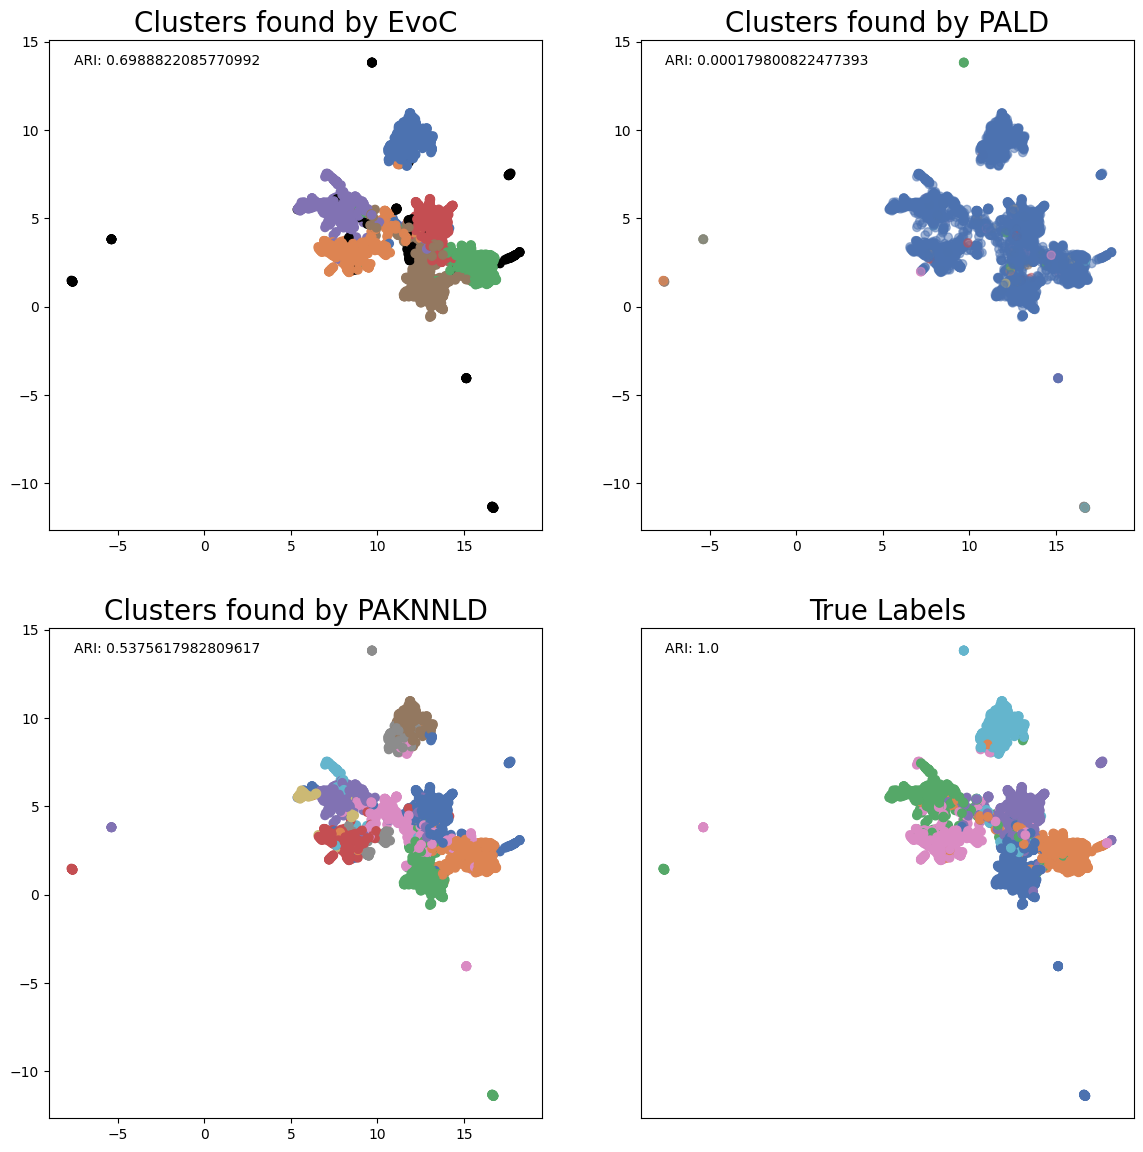

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(14, 14))
# EVoC
print("EVoC")
predict = evoc.EVoC(noise_level=0.1).fit_predict(data)
palette = sns.color_palette("deep", np.unique(predict).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in predict]
ax[0, 0].scatter(data_map.T[0], data_map.T[1], c=colors)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
ax[0, 0].set_title("Clusters found by EvoC", fontsize=20)
ax[0, 0].annotate(
    f"ARI: {ari(predict, labels)}", xy=(0.05, 0.95), xycoords="axes fraction"
)

# PALD
print("PALD")
predict = pald.PALD(metric="cosine").fit(data).labels_
palette = sns.color_palette("deep", np.unique(predict).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in predict]
ax[0, 1].scatter(data_map.T[0], data_map.T[1], c=colors, alpha=0.5)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
ax[0, 1].set_title("Clusters found by PALD", fontsize=20)
ax[0, 1].annotate(
    f"ARI: {ari(predict, labels)}", xy=(0.05, 0.95), xycoords="axes fraction"
)

# PALD
print("PAKNNLD")
predict = pald.PAKNNLD().fit_predict(data)
palette = sns.color_palette("deep", np.unique(predict).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in predict]
ax[1, 0].scatter(data_map.T[0], data_map.T[1], c=colors)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
ax[1, 0].set_title("Clusters found by PAKNNLD", fontsize=20)
ax[1, 0].annotate(
    f"ARI: {ari(predict, labels)}", xy=(0.05, 0.95), xycoords="axes fraction"
)

# Labels
palette = sns.color_palette("deep", np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
ax[1, 1].scatter(data_map.T[0], data_map.T[1], c=colors)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
ax[1, 1].set_title("True Labels", fontsize=20)
ax[1, 1].annotate(f"ARI: {ari(labels, labels)}", xy=(0.05, 0.95), xycoords="axes fraction")